# Assignment 2: Spam Classification with SVM - Kat Young (kmy9ca)

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia

![Spam email](https://www.saleshandy.com/blog/wp-content/uploads/2017/01/wsi-imageoptim-11-Reasons-Why-Your-Email-Ends-Up-In-Spam.png)

*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (20 pts)

**Data Acquiring:** Download the spam dataset from UC Irvine. You can find the dataset attached with the assignment in Collab. Note that the data is in raw file, so you have to convert them into a readable format (ie. CSV). Please be sure to read its documentation to learn more about the dataset. 

**Data Splitting:** Put data into the format needed for classification task, then split it into 80% training, 20% testing (each should have approximately the same proportion between positive and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your SVM model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard library StandardScaler to normalize the value of each features.

In [1]:
# You might want to use the following packages
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

################ DATA ACQUIRING ##################
import pandas as pd


names = ['word_freq_make', 'word_freq_address', 'word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet',
'word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font',
'word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs',
'word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999',
'word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total', 'spam']

data = pd.read_csv('spambase.data', index_col = False, header=None, names=names)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [2]:
################### DATA SPLITTING #####################
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

X_train = train_set.drop(['spam'], axis=1)
y_train = train_set['spam']
X_test = test_set.drop(['spam'], axis=1)
y_test = test_set['spam']

In [3]:
corr_matrix = data.corr()
print(corr_matrix)

#I DONT KNOW WHAT ELSE TO DO HERE.

                            word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000          -0.016759       0.065627   
word_freq_address                -0.016759           1.000000      -0.033526   
word_freq_all                     0.065627          -0.033526       1.000000   
word_freq_3d                      0.013273          -0.006923      -0.020246   
word_freq_our                     0.023119          -0.023760       0.077734   
word_freq_over                    0.059674          -0.024840       0.087564   
word_freq_remove                  0.007669           0.003918       0.036677   
word_freq_internet               -0.003950          -0.016280       0.012003   
word_freq_order                   0.106263          -0.003826       0.093786   
word_freq_mail                    0.041198           0.032962       0.032075   
word_freq_receive                 0.188459          -0.006864       0.048254   
word_freq_will                    0.1058

In [4]:
## I chose the top five attributes from correlation matrix to plot.

from pandas.plotting import scatter_matrix
attributes = ["word_freq_remove", "word_freq_you", "word_freq_your", "word_freq_000", "char_freq_$"]
scatter_matrix(data[attributes], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1080f8668>,
      dtype=object)

In [5]:
#################### DATA CLEANING ###################
## Check to see if there are any missing values. 
data.isna().any()

## Since there are no missing values, we do not have to use the Imputer.

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

#### FEATURE SCALING

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## scale X_train
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_train.head()

## scale X_test
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.head()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.348996,-0.174342,-0.582527,-0.056502,-0.511836,-0.374607,-0.284923,-0.281985,-0.336827,-0.355597,...,-0.093184,-0.162479,-0.658312,-0.112194,-0.449216,-0.319094,-0.078877,-0.157003,-0.406645,-0.399100
1,1.768000,-0.174342,0.866389,-0.056502,-0.511836,-0.374607,-0.284923,-0.281985,-0.336827,0.707876,...,-0.093184,-0.162479,-0.658312,-0.112194,-0.449216,-0.319094,-0.078877,-0.155852,-0.398320,-0.360217
2,-0.348996,-0.174342,1.274534,-0.056502,-0.511836,-0.374607,-0.284923,0.914459,-0.336827,-0.355597,...,-0.093184,-0.162479,-0.658312,-0.112194,-0.449216,-0.319094,-0.078877,-0.145495,-0.356697,-0.265019
3,-0.348996,-0.174342,-0.582527,-0.056502,-0.511836,-0.374607,-0.284923,-0.281985,-0.336827,-0.355597,...,-0.093184,-0.162479,0.365749,-0.112194,-0.449216,0.095835,-0.078877,-0.029409,0.076188,-0.214068
4,-0.348996,-0.174342,0.519466,-0.056502,-0.511836,-0.374607,-0.284923,-0.281985,-0.336827,-0.355597,...,-0.093184,-0.162479,0.299516,0.217623,-0.449216,-0.319094,-0.078877,-0.130211,-0.315073,-0.283790


- - -
## 2. TRAINING LINEAR SVM FOR SPAM CLASSIFICATION (15 pts)

Train your linear SVM classifier on the training data, and then test the classifier on the test data. You may use the default **loss function** (="hinge") and **default** value of the C hyperparameter (=1.0):

* Report (1) accuracy, (2) precision, (3) recall, and (4) F-score on the test data
* Create an ROC curve, using 100 evenly spaced thresholds, for this SVM. You may use library function calls to create the ROC curve.

**Implementation Notes:** For SVM, you do NOT need to add a column of 1's to the $\mathbf{x}$ matrix to have an intercept term



In [7]:
from sklearn.svm import LinearSVC

# Training your svm here
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X_train, y_train)

# (1) ACCURACY
from sklearn.metrics import accuracy_score

y_pred = svm_clf.predict(X_test)
lin_accuracy = accuracy_score(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
# (3) PRECISION, RECALL, FSCORE
from sklearn.metrics import precision_recall_fscore_support
lin_precision, lin_recall, lin_fscore, lin_support = precision_recall_fscore_support(y_test, y_pred, average="macro")
print("Accuracy: ", lin_accuracy)
print("Precision: ", lin_precision)
print("Recall: ", lin_recall)
print("F-Score: ", lin_fscore)

Accuracy:  0.9142236699239956
Precision:  0.9191986194789131
Recall:  0.9058670143415906
F-Score:  0.9108953814614289


### ROC CURVE

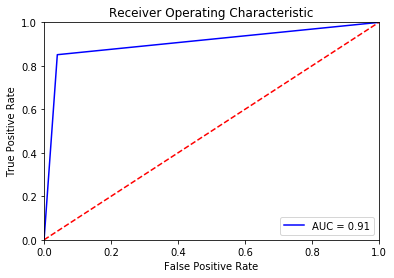

In [9]:
#Create an ROC curve, using 100 evenly spaced thresholds, for this SVM. 
#You may use library function calls to create the ROC curve.

# IDK IF THIS IS CORRECT.

import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- - -
## 3. TUNING REGULARIZATION HYPER-PARAMETER C (15 pts)
Next, you will study the SVM tradeoff between margin and data violation by using different values of the C hyper-parameter. Your task is to run an experiment with different values of C on the spam dataset and report the performance measures similar to section 2. After running the experiment, you must provide some justifications on the reason you select a certain value of C. 

Hint: you can use cross validation for each value of C and then pick the value which yields the best performance.

In [10]:
#### use grid search
## set up the parameter and then call grid search
## similar example in end-to-end machine learning project

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [1,2,3,4,5]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=30)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done   5 out of  25 | elapsed:   43.2s remaining:  2.9min
[Parallel(n_jobs=30)]: Done  18 out of  25 | elapsed:  2.4min remaining:   56.6s
[Parallel(n_jobs=30)]: Done  25 out of  25 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=30,
       param_grid=[{'kernel': ['linear'], 'C': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [11]:
### Best parameters found
c_value = grid_search.best_params_.get("C")
print("The best valuve of C from the set is: ", c_value)

The best valuve of C from the set is:  1


In [12]:
##Your task is to run an experiment with different values of C on the spam dataset and 
##report the performance measures similar to section 2

svm_pt3 = LinearSVC(C=c_value, loss="hinge", random_state=42)
svm_pt3.fit(X_train, y_train)
    
y_pred3 = svm_pt3.predict(X_test)
lin3_accuracy = accuracy_score(y_test, y_pred3)

lin3_precision, lin3_recall, lin3_fscore, lin3_support = precision_recall_fscore_support(y_test, y_pred3, average="macro")
print("Accuracy: ", lin3_accuracy)
print("Precision: ", lin3_precision)
print("Recall: ", lin3_recall)
print("F-Score: ", lin3_fscore)



Accuracy:  0.9142236699239956
Precision:  0.9191986194789131
Recall:  0.9058670143415906
F-Score:  0.9108953814614289


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


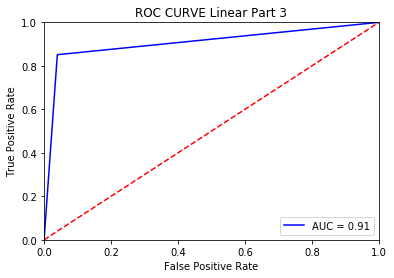

In [33]:
fpr_lin3, tpr_lin3, thresholds_rbf = metrics.roc_curve(y_test, y_pred3)
roc_auc_lin3 = metrics.auc(fpr_lin3, tpr_lin3)

import matplotlib.pyplot as plt
plt.title('ROC CURVE Linear Part 3')
plt.plot(fpr_lin3, tpr_lin3, 'b', label = 'AUC = %0.2f' % roc_auc_lin3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This value for C was chosen because it minimized error the best, by maximiazing other metrics like F-score, accuracy, recall, and precision. Out of the values for C that were tested for, this value provided the results with the highest F-score and combination of precision and recall. The hyperparameter C controlls how much data points are allowed to violate the constraint. If C is really large, less violations are allowed, and the margin is smaller. If C is small, relatively more violations are allowed and the margin is larger.

- - -
## 4. SELECTING THE FEATURES WITH LINEAR SVM (20 pts)

Once your learned a best linear SVM in previous sections, your next task is to find which are best features to classify spam. First, you must obtain the weight vector $\mathbf{w}$ using the attribute $coef_$ of your SVM classifier. Then, for the number of features $n = 2$ to $57$, you will run the following in a loop:

* Select a set of top $n$ features that have the highest weights
* Train a classifier $\text{SVM}_n$ on all training data, only using these $n$ features with the same hyperparameter C learn from section 3.
* Test $\text{SVM}_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

Identify the top 5 features. Using the plot, discuss the effects of feature selection on the performance in a short paragraph (ie. How much better the performance becomes everytime one of top 5 features is added? Were the top spam features surprising to you?)  



In [13]:
import numpy as np
import operator

w = svm_clf.coef_[0]                    # weight vectors
w = [abs(number) for number in w]       # take absolute values
w_names = names[:57]                    # get names from original table

w_zipped = dict(zip(w_names,w))         # create dictionary with names matched to weights

## Sort weights in descending order
w_zipped = dict(sorted(w_zipped.items(), key=operator.itemgetter(1), reverse=True)) 


accuracy = []         # list for accuracies
n_list = []           # list for n attributes

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for n in range(2,57):
    n_subset = []
    for i in range(0,n):
        n_subset.append(list(w_zipped.keys())[i])   #get n values in list
    
    n_train = train_set[n_subset] # get subset of attribute data for train and test
    n_test = test_set[n_subset]
    
    # scale data
    scaler.fit(n_train)
    n_train_scaled = pd.DataFrame(scaler.transform(n_train), columns=n_subset)
    
    scaler.fit(n_test)
    n_test_scaled = pd.DataFrame(scaler.transform(n_test), columns=n_subset)
    
    svm_pt4 = LinearSVC(C=c_value, loss="hinge", random_state=42)
    svm_pt4.fit(n_train_scaled, y_train)
    
    y_pred4 = svm_pt4.predict(n_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred4))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/

In [15]:
top_5_features = []

for p in range(0,5):
    top_5_features.append(list(w_zipped.keys())[p])

print("Top 5 Features: ", top_5_features)    

Top 5 Features:  ['word_freq_george', 'word_freq_hp', 'word_freq_cs', 'capital_run_length_longest', 'word_freq_edu']


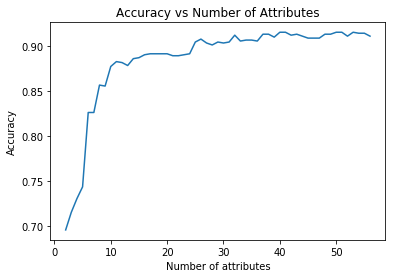

In [16]:
import matplotlib.pyplot as plt

n_value = range(2, 57)

plt.title('Accuracy vs Number of Attributes')
plt.plot(n_value, accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Number of attributes')
plt.show()

The top 5 features ended up being 'word_freq_george', 'word_freq_hp', 'word_freq_cs', 'capital_run_length_longest', and 'word_freq_edu'. Every time one of the top 5 features is added, accuracy increases at a significant rate. Looking at the graph, adding the first ten or so features creates dramatic increases in accuracy. The increases in accuracy begin to plateau around 15 attributes, although the accuracies do continue to get better as features are added. While the increases in accuracy seen around 50 attributes are lesser than incerases around 5 attributes, they are still beneficial, leading to higher absolute accuracy.

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on this dataset which is not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

First, your task is to determine the best regularization $C$ and the spread of the Gaussian kernel $\gamma$ hyperparameters to use. You can train the SVM on the training set and report the performance in metrics from section 2. By using different values of $C$ and $\gamma$, you will be able to learn a good non-linear decision boundary that can perform reasonably well for this dataset. 

Next, you will compare the performance of this kernelized version of SVM and the of linear SVM in Section 3. You will need to plot out the performance in terms of accuracy, precision, and recall, and the ROC curve) for both. How much better does your non-linear SVM classifier perform comparing to a linear SVM? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error using cross validation.

Finally, write a paragraph reporting on the final performance of your RBF kerneled SVM. Do you think the performance is adequate to be deployed in practice? Justify your reasons.




In [17]:
from sklearn.svm import SVC

param_grid_rbf = [
        {'kernel': ['rbf'], 'C': [0.25,1,2,5,10],
         'gamma': [0.01, 0.03, 0.05, 0.1, 0.2]}
    ]

svm_rbf = SVR()
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['rbf'], 'C': [1, 2], 'gamma': [0.01, 0.03]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [19]:
grid_search_rbf.best_params_
rbf_gamma = grid_search_rbf.best_params_['gamma']
rbf_C = grid_search_rbf.best_params_['C']
print("Best C: ", rbf_C)
print("Best Gamma: ", rbf_gamma)

Best C:  1
Best Gamma:  0.03


In [20]:
svm_rbf = SVC(C=rbf_C, gamma = rbf_gamma)
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred)

In [21]:
rbf_precision, rbf_recall, rbf_fscore, support = precision_recall_fscore_support(y_test, y_pred, average="macro")

In [22]:
print("RBF Accuracy: ", rbf_accuracy)
print("RBF Precision: ", rbf_precision)
print("RBF Recall: ", rbf_recall)
print("RBF F-Score: ", rbf_fscore)

RBF Accuracy:  0.9294245385450597
RBF Precision:  0.9336184934426393
RBF Recall:  0.9224540055048529
RBF F-Score:  0.9268741365431432


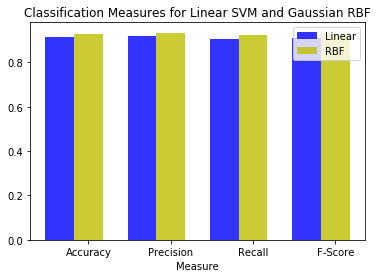

In [28]:
# data to plot
n_groups = 4
data_lin = (lin3_accuracy, lin3_precision, lin3_recall, lin3_fscore)
data_rbf = (rbf_accuracy, rbf_precision, rbf_recall, rbf_fscore)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, data_lin, bar_width,
alpha=opacity,
color='b',
label='Linear')

rects2 = plt.bar(index + bar_width, data_rbf, bar_width,
alpha=opacity,
color='y',
label='RBF')

plt.xlabel('Measure')
plt.title('Classification Measures for Linear SVM and Gaussian RBF')
plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'Recall', 'F-Score'))
plt.legend()

In [35]:
print("Linear Accuracy: ", lin3_accuracy, " vs. RBF Accuracy: ", rbf_accuracy)
print("Linear Precision: ", lin3_precision, "vs. RBF Precision: ", rbf_precision)
print("Linear Recall: ", lin3_recall, "vs. RBF Recall: ", rbf_recall)
print("Linear F-Score: ", lin3_fscore, "vs. RBF F-Score: ", rbf_fscore)

Linear Accuracy:  0.9142236699239956  vs. RBF Accuracy:  0.9294245385450597
Linear Precision:  0.9191986194789131 vs. RBF Precision:  0.9336184934426393
Linear Recall:  0.9058670143415906 vs. RBF Recall:  0.9224540055048529
Linear F-Score:  0.9108953814614289 vs. RBF F-Score:  0.9268741365431432


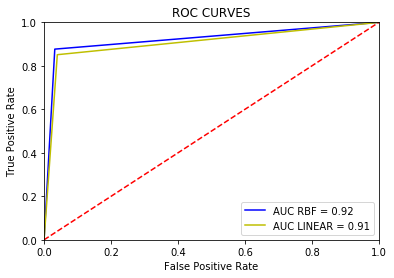

In [34]:
### plot out RBF
fpr_rbf, tpr_rbf, thresholds_rbf = metrics.roc_curve(y_test, y_pred)
roc_auc_rbf = metrics.auc(fpr_rbf, tpr_rbf)

import matplotlib.pyplot as plt
plt.title('ROC CURVES')
plt.plot(fpr_rbf, tpr_rbf, 'b', label = 'AUC RBF = %0.2f' % roc_auc_rbf)
plt.plot(fpr_lin3, tpr_lin3, 'y', label = 'AUC LINEAR = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In this case, RBF only performed slightly better than the linear model. RBF Accuracy, Precision, Recall, and F-Score are all around 1.5% better than the same measures of the linear model. 


- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 2:...".

Best of luck and have fun!